# ***COMP4388: Machine Learning***
# ***Mohammad Rjoub***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = "C:/Users/ACTC/Downloads/Customer Churn.csv"
data = pd.read_csv(file_path).drop(columns=['ID'])
print(data.columns)

Index(['Call Failure', 'Complains', 'Charge Amount', 'Freq. of use',
       'Freq. of SMS', 'Distinct Called Numbers', 'Age Group', 'Plan',
       'Status', 'Age', 'Customer Value', 'Churn'],
      dtype='object')


import necessary libraries and read the data from the file.

In [2]:
print("Summary Statistics:\n", data.describe().to_string(), "\n")
print(data['Complains'].value_counts(), "\n")
print(data['Plan'].value_counts(), "\n")
print(data['Status'].value_counts(), "\n")
print(data['Churn'].value_counts())

Summary Statistics:
        Call Failure  Charge Amount  Freq. of use  Freq. of SMS  Distinct Called Numbers    Age Group          Age  Customer Value
count   3150.000000    3150.000000   3150.000000   3150.000000              3150.000000  3150.000000  3150.000000     3150.000000
mean       7.627937     129.882540     69.460635     73.174921                23.509841     2.826032    30.998413      470.972916
std        7.263886     102.790931     57.413308    112.237560                17.217337     0.892555     8.831095      517.015433
min        0.000000      20.000000      0.000000      0.000000                 0.000000     1.000000    15.000000        0.000000
25%        1.000000      50.000000     27.000000      6.000000                10.000000     2.000000    25.000000      113.801250
50%        6.000000     100.000000     54.000000     21.000000                21.000000     3.000000    30.000000      228.480000
75%       12.000000     200.000000     95.000000     87.000000       

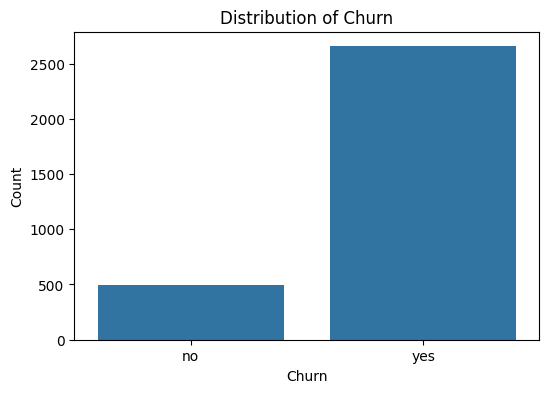

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

plot the distribution of the target class (churn).

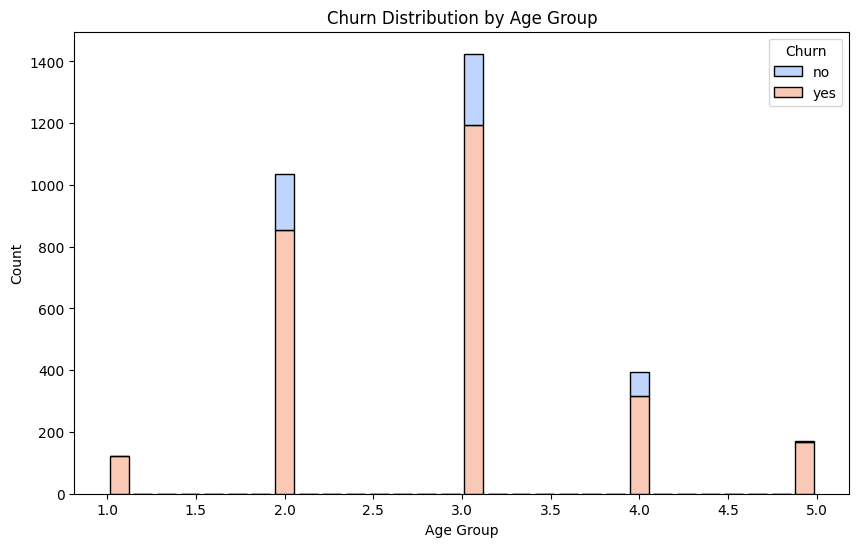

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age Group', hue='Churn', multiple="stack", palette='coolwarm', shrink=0.8)
plt.title("Churn Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

plotting amount of churn in each age group.

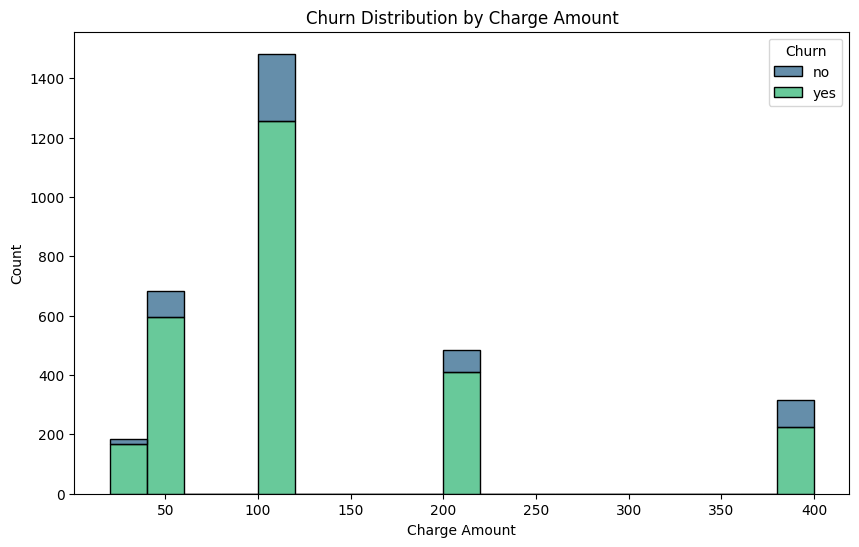

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Charge Amount', hue='Churn', multiple="stack", palette='viridis')
plt.title("Churn Distribution by Charge Amount")
plt.xlabel("Charge Amount")
plt.ylabel("Count")
plt.show()

 plotting amount of churn in each charge amount group.

Charge Amount Details:
 count    3150.000000
mean      129.882540
std       102.790931
min        20.000000
25%        50.000000
50%       100.000000
75%       200.000000
max       400.000000

Charge Amount Mode:  100

Charge Amount Destruction: Charge Amount
100    1483
50      683
200     485
400     315
20      184
Name: count, dtype: int64


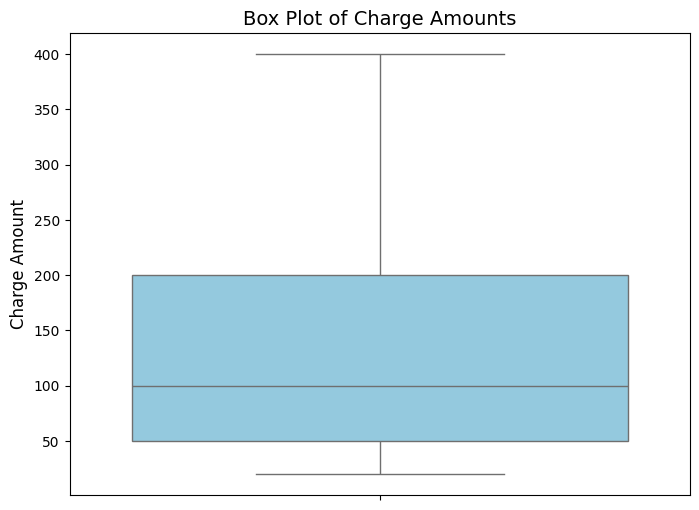

In [6]:
print("Charge Amount Details:\n", data['Charge Amount'].describe().to_string())
print("\nCharge Amount Mode: ", data['Charge Amount'].mode().values[0])
print("\nCharge Amount Destruction:", data['Charge Amount'].value_counts())
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Charge Amount', color='skyblue')
plt.title('Box Plot of Charge Amounts', fontsize=14)
plt.ylabel('Charge Amount', fontsize=12)
plt.show()

details of the charge amount of customers.

In [7]:
le = LabelEncoder()
data['Complains'] = le.fit_transform(data['Complains'])
data['Plan'] = le.fit_transform(data['Plan'])
data['Status'] = le.fit_transform(data['Status'])
data['Churn'] = le.fit_transform(data['Churn'])

Represent the non-numerical values as zeros and ones

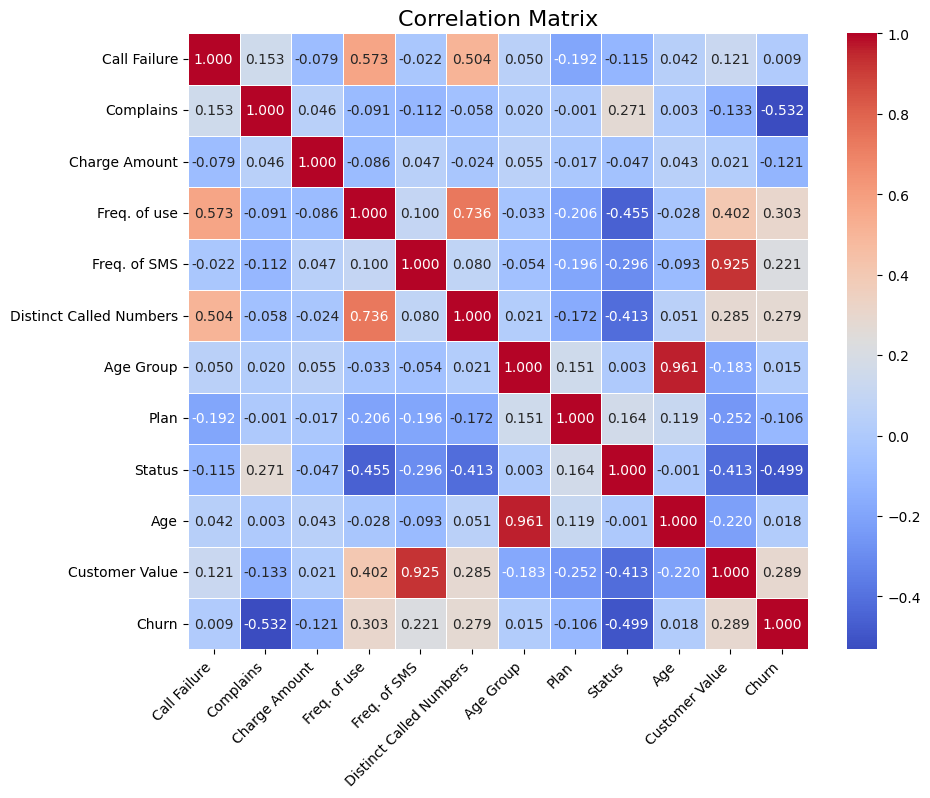

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Calculate and visualize the Correlation matrix
from the above chart we can analyse the relation between the features
For the Churn class: we notice that Complains, Freq. of use, Freq. of SMS, Distinct Called Numbers, Status and Customer Value
are the most feature related and have effect on the Churn class, and can be used for predict it.
For Customer Value: Freq. of SMS, Freq. of use, Distinct Called Numbers, Churn and Status are
the most feature related and have effect on the Customer Value, and can be used for predict it.

In [9]:
X = data.drop(columns=['Customer Value'])
y = data['Customer Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Split the dataset into training (70%) and test (30%) to use for predicting the Customer Value.

# ***Regression Tasks***

In [10]:
lrm1 = LinearRegression()
lrm1.fit(X_train, y_train)

y_pred = lrm1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 6868.52
Mean Absolute Error (MAE): 55.18
R-squared (R²): 0.97


Apply linear regression to learn the attribute Customer Value using all independent attributes

In [11]:
X = data[['Freq. of use', 'Freq. of SMS']]
y = data['Customer Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lrm2 = LinearRegression()
lrm2.fit(X_train, y_train)

y_pred = lrm2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 11047.66
Mean Absolute Error (MAE): 64.42
R-squared (R²): 0.96


Apply linear regression using the set of the 2 most important features
Here I choose 'Freq. of use', 'Freq. of SMS' as the 2 most important features passed on the correlation matrix and
by experimentally test all possible choices to get the minimum Mean Squared Error that can be achieved.

In [12]:
X = data[['Freq. of SMS', 'Freq. of use', 'Distinct Called Numbers', 'Churn', 'Status']]
y = data['Customer Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lrm3 = LinearRegression()
lrm3.fit(X_train, y_train)

y_pred = lrm3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 10888.94
Mean Absolute Error (MAE): 63.04
R-squared (R²): 0.96


Apply linear regression using the set of the most important features (based on the correlation coefficient matrix)
here in choosing the features I choose the most features that have a large and strong relation to the Customer Value
and by experimentally test various cases I found that these Features are best to use in predicting Customer Value and give minimum Value of Mean Squared Error.

||LR1|LR2|LR3|
|----|----|----|-------|
|MSE|6868.52|11047.66|10888.94|
|MAE|55.18|64.42|63.04|
|R²|0.97|0.96|0.96|

LRM1 provides the best predictive performance, with the lowest error and highest explained variance,
LRM3 does not significantly improve performance over LRM2, which means the additional features may not add much value.

# ***Classification Tasks***

In [13]:
X = data[['Call Failure', 'Complains', 'Charge Amount', 'Freq. of use', 'Freq. of SMS', 'Plan', 'Status', 'Age']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Extract the most important features based on Correlation Matrix and By Testing all combination to get the maximum possible Accuracy.
then perform Feature Scaling to ensure models work perfect with features that are standardized (mean = 0, standard deviation = 1).

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)


KNN Accuracy: 93.02%
Confusion Matrix:
[[117  32]
 [ 34 762]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       149
           1       0.96      0.96      0.96       796

    accuracy                           0.93       945
   macro avg       0.87      0.87      0.87       945
weighted avg       0.93      0.93      0.93       945



Run k-Nearest Neighbours classifier to predict churn of customers using the test set.
first we initialize the model then train it using 70% of the data set and
Evaluate the model using Accuracy, precision, recall and F-Score.


In [15]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nNaive Bayes Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)


Naive Bayes Accuracy: 84.44%
Confusion Matrix:
[[137  12]
 [135 661]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.92      0.65       149
           1       0.98      0.83      0.90       796

    accuracy                           0.84       945
   macro avg       0.74      0.87      0.78       945
weighted avg       0.91      0.84      0.86       945



Run Naive Bayes classifier to predict churn of customers using the test set.
first we initialize the model then train it using 70% of the data set and
Evaluate the model using Accuracy, precision, recall and F-Score.

In [16]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)


Decision Tree Accuracy: 93.97%
Confusion Matrix:
[[125  24]
 [ 33 763]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       149
           1       0.97      0.96      0.96       796

    accuracy                           0.94       945
   macro avg       0.88      0.90      0.89       945
weighted avg       0.94      0.94      0.94       945



Run Decision Tree classifier to predict churn of customers using the test set.
first we initialize the model then train it using 70% of the data set and
Evaluate the model using Accuracy, precision, recall and F-Score.

In [17]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f"\nLogistic Regression Accuracy: {accuracy_score(y_test, y_pred)*100: 0.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)


Logistic Regression Accuracy:  91.43%
Confusion Matrix:
[[ 72  77]
 [  4 792]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.48      0.64       149
           1       0.91      0.99      0.95       796

    accuracy                           0.91       945
   macro avg       0.93      0.74      0.80       945
weighted avg       0.92      0.91      0.90       945



Run Logistic Regression classifier to predict churn of customers using the test set.
first we initialize the model then train it using 70% of the data set and
Evaluate the model using Accuracy, precision, recall and F-Score.

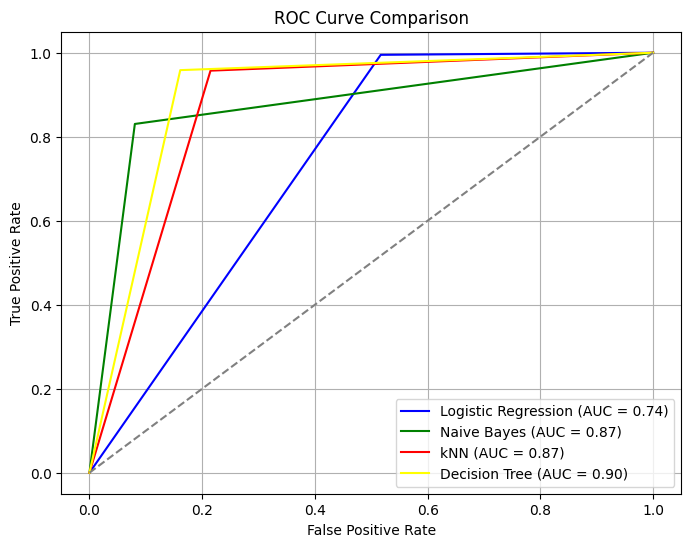

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})', color='green')
plt.plot(fpr_knn, tpr_knn, label=f'kNN (AUC = {roc_auc_knn:.2f})', color='red')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='yellow')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Results

| Model                   | Accuracy (%) | Precision         | Recal         | F-Score         | ROC/AUC  | Confusion Matrix        |
|-------------------------|--------------|-------------------|---------------|-----------------|----------|-------------------------|
| **kNN**                 | 93.02        | 0.96              | 0.96          | 0.96            | High     | [[117, 32], [34, 762]]  |
| **Naive Bayes**         | 84.44        | 0.98              | 0.83          | 0.90            | Moderate | [[137, 12], [135, 661]] |
| **Decision Tree**       | 93.97        | 0.97              | 0.96          | 0.96            | High     | [[125, 24], [33, 763]]  |
| **Logistic Regression** | 91.43        | 0.91              | 0.99          | 0.95            | High     | [[72, 77], [4, 792]]    |


The Decision Tree is the best model because it has the highest accuracy and balanced precision, recall, and F-score. It works well with both linear and non-linear data. kNN also performs well but struggles a bit with generalizing due to its sensitivity to how the data is distributed. Logistic Regression is good for cases where Churn Yes is more common, but its focus on linear relationships makes it less effective for No Class. Naive Bayes is simple and fast but doesn’t perform as well because it assumes the features are completely independent, which is not always true.